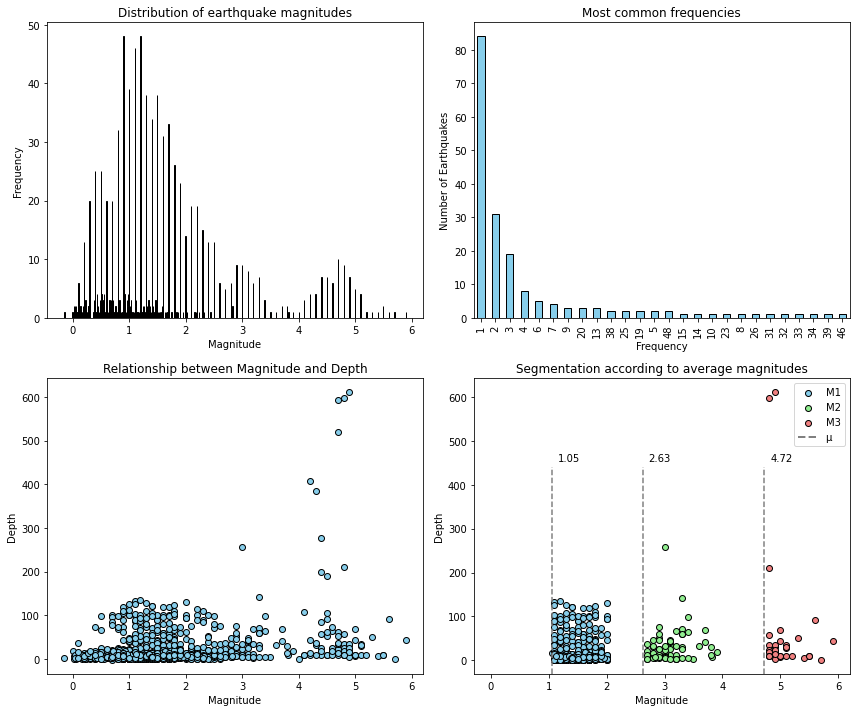

In [23]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np


url = 'https://soda.demo.socrata.com/resource/earthquakes.json'
response = requests.get(url)
data = response.json()

# Create the earthquake data list
earthquake_data = [{'magnitude': item['magnitude'], 'depth': item['depth'], 
                    'region': item['region']} for item in data]

# Create a DataFrame from the above list
df = pd.DataFrame(earthquake_data)


# Convert column from magnitude to numeric type
df['magnitude'] = pd.to_numeric(df['magnitude'])
df['depth'] = pd.to_numeric(df['depth'])

# Calculate the magnitude averages for each interval
mean_magnitude_1 = df.loc[(df['magnitude'] >= 0) & (df['magnitude'] <= 2), 'magnitude'].mean()
mean_magnitude_2 = df.loc[(df['magnitude'] > 2) & (df['magnitude'] < 4), 'magnitude'].mean()
mean_magnitude_3 = df.loc[(df['magnitude'] >= 4) & (df['magnitude'] < 6), 'magnitude'].mean()


# Define the conditions and choices for np.select
condlist = [
    (df['magnitude'] >= 0) & (df['magnitude'] <= 2),
    (df['magnitude'] > 2) & (df['magnitude'] < 4),
    (df['magnitude'] >= 4) & (df['magnitude'] < 6)
]
choicelist = [
    np.where(df['magnitude'] > mean_magnitude_1, 'M1', ''),
    np.where(df['magnitude'] > mean_magnitude_2, 'M2', ''),
    np.where(df['magnitude'] > mean_magnitude_3, 'M3', '')
]

# Apply np.select to get the corresponding labels
df['label'] = np.select(condlist, choicelist, '')

# Create a 'grid' with two rows and two columns
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot the histogram on the first subplot of the first row
axes[0, 0].hist(df['magnitude'], bins=1000, color='skyblue', edgecolor='black')
axes[0, 0].set_xlabel('Magnitude')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of earthquake magnitudes')

frequencies_group = df['magnitude'].value_counts()

# Access the first column
#column1 = list(frequencies_group.groupby(frequencies_group).size().index)
# Access the second column
#column2 = frequencies_group.groupby(frequencies_group).size().iloc[:]
#total_obj = sum([i*elem for i, elem in zip(column1, column2)])
#print(total_obj)
most_common_frequencies = frequencies_group.groupby(frequencies_group
                                                   ).size().sort_values(ascending=False)

most_common_frequencies.plot.bar(ax=axes[0, 1], color='skyblue', edgecolor='black')
axes[0, 1].set_xlabel('Frequency')
axes[0, 1].set_ylabel('Number of Earthquakes')
axes[0, 1].set_title('Most common frequencies')

# Plot the scatter plot of magnitudes and depths on the third subplot
axes[1, 0].scatter(df['magnitude'], df['depth'], color='skyblue', edgecolor='black')
axes[1, 0].set_xlabel('Magnitude')
axes[1, 0].set_ylabel('Depth')
axes[1, 0].set_title('Relationship between Magnitude and Depth')

# Labels for magnitude
labels = ['M1', 'M2', 'M3']
colors = ['skyblue', 'lightgreen', 'lightcoral']

for label, color in zip(labels, colors):
    x = df.loc[df['label'] == label, 'magnitude']
    y = df.loc[df['label'] == label, 'depth']
    axes[1, 1].scatter(x, y, color=color, edgecolor='black', label=label)

# label for μ
axes[1, 1].plot(0, 0, color='gray', linestyle='--', linewidth=2, label='μ')

axes[1, 1].set_xlabel('Magnitude')
axes[1, 1].set_ylabel('Depth')
axes[1, 1].set_title('Segmentation according to average magnitudes')
axes[1, 1].legend()

# Adjust the height of the vertical lines (mean_magnitude)
line_height = 450 

# Adjust the position of the average values
text_offset = 0.1  # Horizontal offset of average values
axes[1, 1].text(mean_magnitude_1 + text_offset, line_height, f'{mean_magnitude_1:.2f}', 
                color='black', ha='left', va='bottom')
axes[1, 1].text(mean_magnitude_2 + text_offset, line_height, f'{mean_magnitude_2:.2f}', 
                color='black', ha='left', va='bottom')
axes[1, 1].text(mean_magnitude_3 + text_offset, line_height, f'{mean_magnitude_3:.2f}', 
                color='black', ha='left', va='bottom')


axes[1, 1].axvline(x=mean_magnitude_1, ymin=0, ymax=line_height/axes[1, 1].get_ylim()[1], 
                   color='gray', linestyle='--')
axes[1, 1].axvline(x=mean_magnitude_2, ymin=0, ymax=line_height/axes[1, 1].get_ylim()[1], 
                   color='gray', linestyle='--')
axes[1, 1].axvline(x=mean_magnitude_3, ymin=0, ymax=line_height/axes[1, 1].get_ylim()[1], 
                   color='gray', linestyle='--')

# Adjust the spacing between the subplots
plt.tight_layout()

plt.show()
